In [ ]:
!pip install TensorFlow==2.15.0
!pip install tensorflowjs==4.17.0
!pip install tensorflow-decision-forests==1.8.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 625.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 36.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 31.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 34.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 51.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 4.4 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.2
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.5
    Uninstalling protobuf-5.29.5:
      Successfully uni

# IMPORT

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import tensorflowjs as tfjs
import tensorflow_decision_forests as tfdf
import json
import os

# DATA UNDERSTANDING

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
           'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
df = pd.read_csv(url, names=columns)


In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


## EDA

### Memeriksa Type Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


### Memeriksa Statistik Deskriptif

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


### Memeriksa Data Duplikat

In [ ]:
print('data duplikat: ', df.duplicated().sum())

data duplikat:  0


### Memeriksa Nilai Null

In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


dilihat tidak ada data yang memiliki nilai null, tetapi akan dilakukan pemeriksaan lebih lanjut terhadap data tersebut

In [ ]:
# prompt: buatkan code untuk mendeteksi value seperti ini 'abc', 'NaN', '?' yang ad didata, buat tampilannya lebih baik

# Check for specific values 'abc', 'NaN', '?' in the DataFrame
def check_for_values(df, values_to_check):
    problem_cols = []
    for col in df.columns:
        for val in values_to_check:
            # Escape special characters in 'val' to treat it literally
            escaped_val = re.escape(val)
            if df[col].astype(str).str.contains(escaped_val, regex=True).any():  # Check for string values
                problem_cols.append(col)
                print(f"Column '{col}' contains '{val}'")
                print(df[df[col].astype(str).str.contains(escaped_val, regex=True)])
                print("-" * 20)  # Separator
    if not problem_cols:
        print("No specified values found in the DataFrame.")

# Call the function
import re # import the re module for regular expression operations
values_to_check = ['abc', 'NaN', '?']
check_for_values(df, values_to_check)

Column 'ca' contains '?'
      age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
166  52.0  1.0  3.0     138.0  223.0  0.0      0.0    169.0    0.0      0.0   
192  43.0  1.0  4.0     132.0  247.0  1.0      2.0    143.0    1.0      0.1   
287  58.0  1.0  2.0     125.0  220.0  0.0      0.0    144.0    0.0      0.4   
302  38.0  1.0  3.0     138.0  175.0  0.0      0.0    173.0    0.0      0.0   

     slope ca thal  num  
166    1.0  ?  3.0    0  
192    2.0  ?  7.0    1  
287    2.0  ?  7.0    0  
302    1.0  ?  3.0    0  
--------------------
Column 'thal' contains '?'
      age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
87   53.0  0.0  3.0     128.0  216.0  0.0      2.0    115.0    0.0      0.0   
266  52.0  1.0  4.0     128.0  204.0  1.0      0.0    156.0    1.0      1.0   

     slope   ca thal  num  
87     1.0  0.0    ?    0  
266    2.0  0.0    ?    2  
--------------------


bisa dilihat terdapat nilai '?' di column 'ca' dan 'thal' yang dimana ini juga termasuk data null atau kosong

In [ ]:
# Improved function to count occurrences of specific values
def count_specific_values(df, values_to_check):
    value_counts = {}
    for col in df.columns:
        for val in values_to_check:
            escaped_val = re.escape(val)
            count = df[df[col].astype(str).str.contains(escaped_val, regex=True)].shape[0]
            if val not in value_counts:
                value_counts[val] = 0
            value_counts[val] += count
    return value_counts

# Call the function and print the results
values_to_check = ['abc', 'NaN', '?']
counts = count_specific_values(df, values_to_check)
print("Counts of specific values:")
for value, count in counts.items():
    print(f"'{value}': {count}")


Counts of specific values:
'abc': 0
'NaN': 0
'?': 6


insight
* tipe data masih tidak sesuai dengan yang info tertera di sumber data aslinya
* label terdapat 5 kelas
* Pemeriksaan awal dengan df.isnull().sum() tidak mendeteksi missing value karena nilai hilang disimpan sebagai karakter '?', bukan NaN, sehingga perlu pengecekan tambahan untuk mengidentifikasinya.


### Periksa Outlier

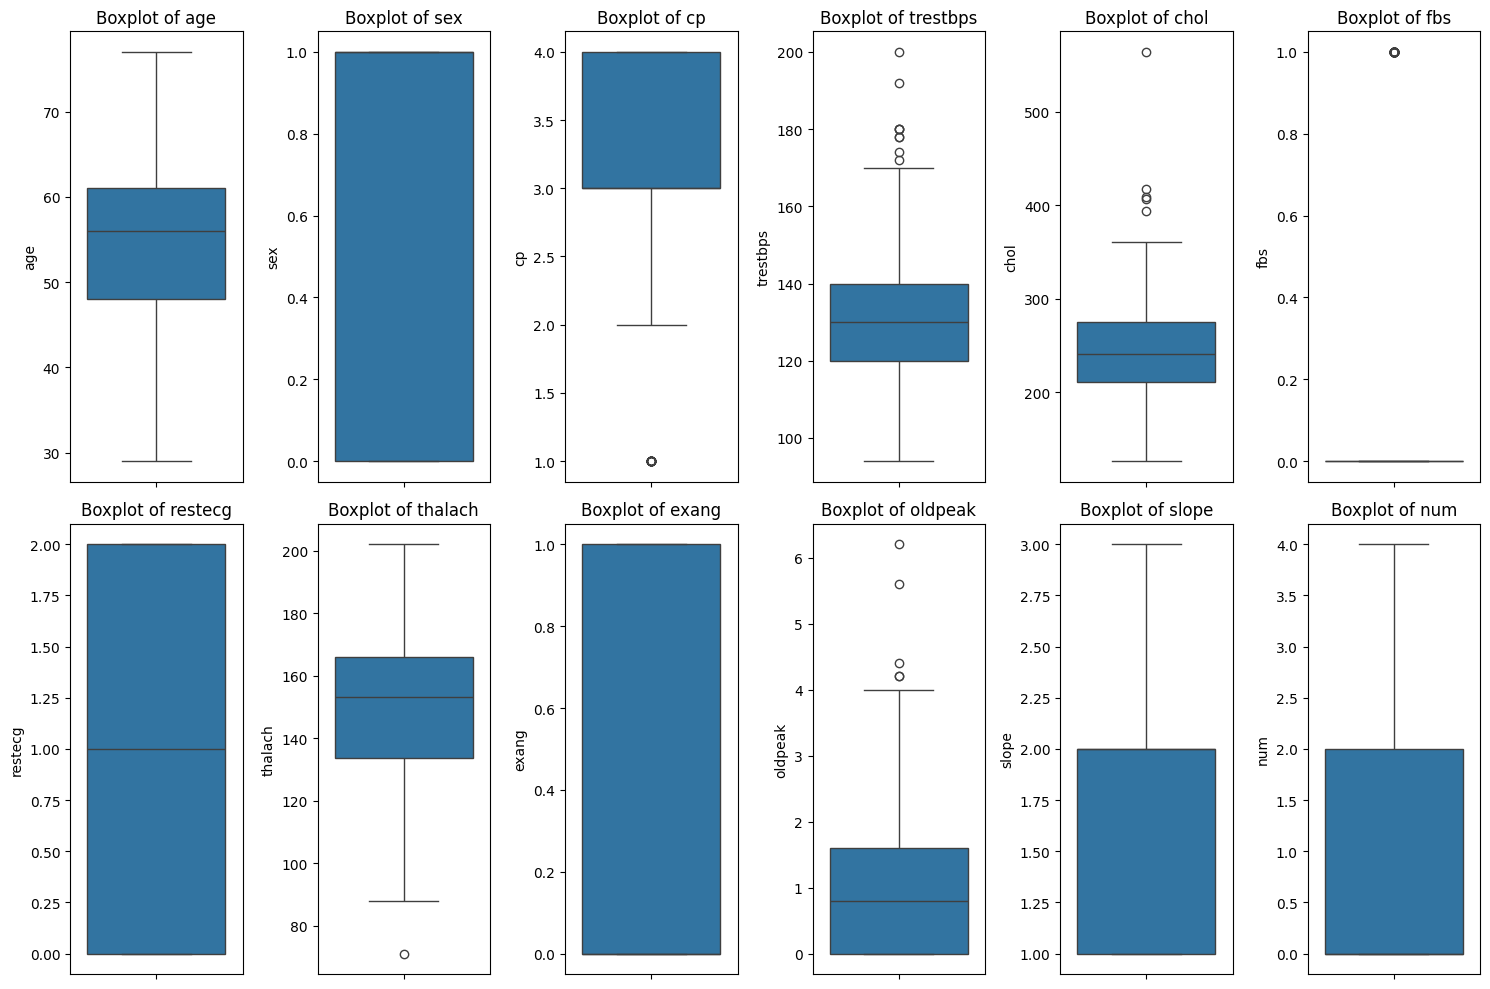

In [ ]:
# Check for outliers using boxplots for numerical columns
# Get all numerical columns from the cleaned DataFrame
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, int(np.ceil(len(numerical_cols)/2)), i + 1) # Adjust subplot grid based on number of columns
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

### Age

#### Visualisasi Kelompok Umur

<ipython-input-12-14ea3999b6e9>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=age_groups, palette='viridis', order=['Muda (1-40)', 'Paruh baya (40-59)', 'Lansia (60)'])


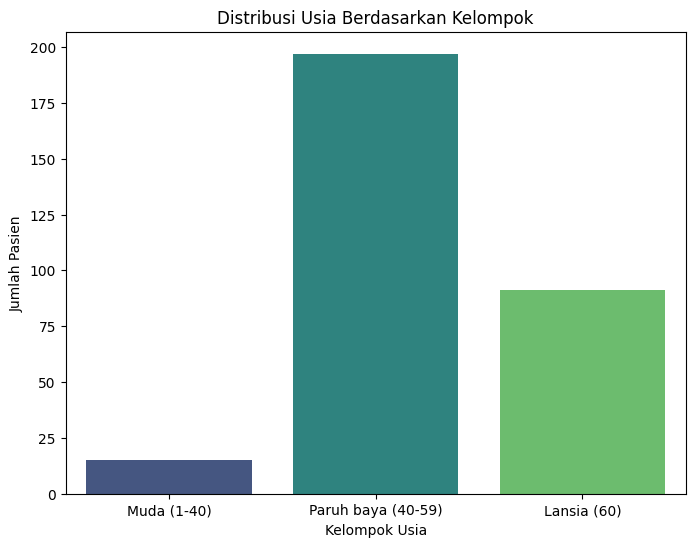

In [ ]:
# Group age into categories
def age_group(age):
    if age < 40:
        return 'Muda (1-40)'
    elif 40 <= age < 60:
        return 'Paruh baya (40-59)'
    else:
        return 'Lansia (60)'

# Create a temporary Series for age groups for plotting
age_groups = df['age'].apply(age_group)

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.countplot(x=age_groups, palette='viridis', order=['Muda (1-40)', 'Paruh baya (40-59)', 'Lansia (60)'])
plt.title('Distribusi Usia Berdasarkan Kelompok')
plt.xlabel('Kelompok Usia')
plt.ylabel('Jumlah Pasien')
plt.show()

### SEX

#### Memeriksa Column SEX

In [ ]:
df['sex'].value_counts()

,count
sex,
1.0,206
0.0,97


#### Visualisasi Jenis Kelamin

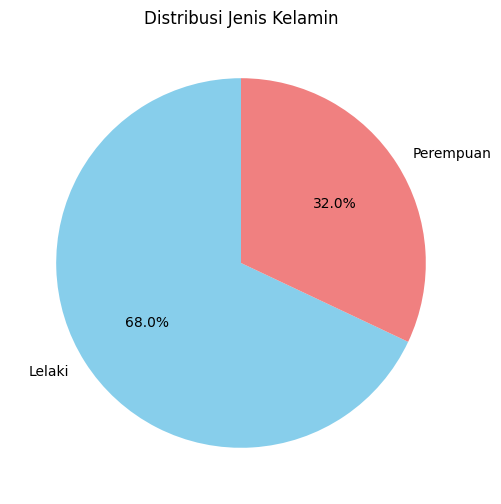

In [ ]:
# Count the occurrences of each sex (0 for female, 1 for male)
sex_counts = df['sex'].value_counts()

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sex_counts, labels=['Lelaki', 'Perempuan'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Distribusi Jenis Kelamin')
plt.show()

### CP

#### Memeriksa Column CP

In [ ]:
df.groupby('cp').count()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
cp,,,,,,,,,,,,,
1.0,23,23,23,23,23,23,23,23,23,23,23,23,23
2.0,50,50,50,50,50,50,50,50,50,50,50,50,50
3.0,86,86,86,86,86,86,86,86,86,86,86,86,86
4.0,144,144,144,144,144,144,144,144,144,144,144,144,144


#### Visualisai CP

<ipython-input-16-fccd9dcd8dd7>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cp_label', data=df, palette='viridis', order=[cp_labels[1], cp_labels[2], cp_labels[3], cp_labels[4]])


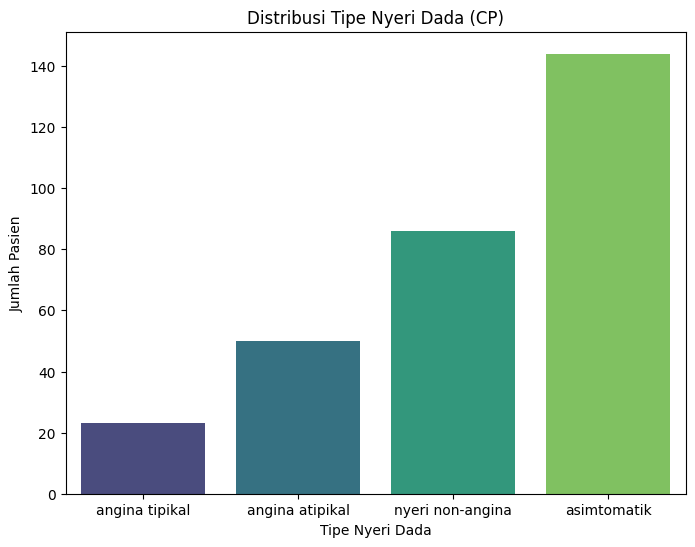

In [ ]:
cp_labels = {
    1: 'angina tipikal',
    2: 'angina atipikal',
    3: 'nyeri non-angina',
    4: 'asimtomatik'
}

# Replace numerical values with labels for plotting
df['cp_label'] = df['cp'].map(cp_labels)

# Create the bar plot for 'cp'
plt.figure(figsize=(8, 6))
sns.countplot(x='cp_label', data=df, palette='viridis', order=[cp_labels[1], cp_labels[2], cp_labels[3], cp_labels[4]])
plt.title('Distribusi Tipe Nyeri Dada (CP)')
plt.xlabel('Tipe Nyeri Dada')
plt.ylabel('Jumlah Pasien')
plt.show()

# Drop the temporary 'cp_label' column
df.drop('cp_label', axis=1, inplace=True)

### TRESTBPS

#### Memeriksa Column TRESTBPS

In [ ]:
print('Mean:', df['trestbps'].mean())
print('Min:', df['trestbps'].min())
print('Max:', df['trestbps'].max())

Mean: 131.68976897689768
Min: 94.0
Max: 200.0


#### Visualisasi TRESTBPS

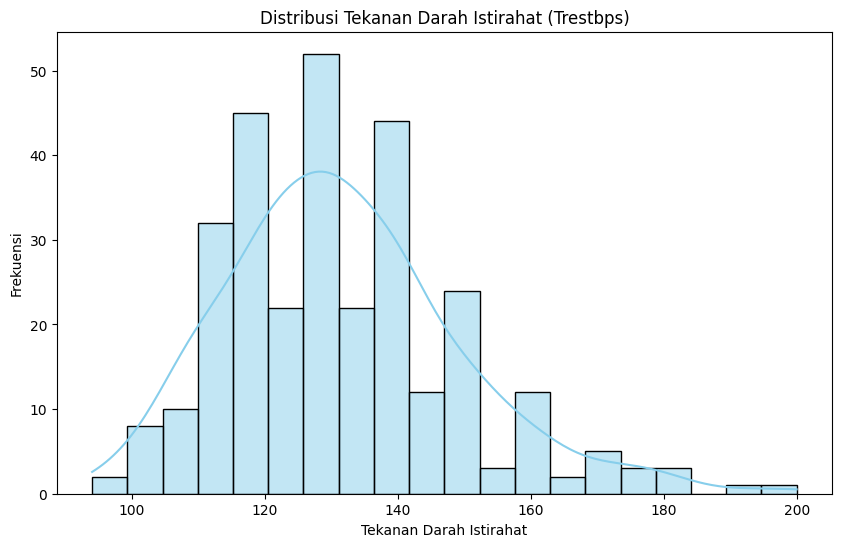

In [ ]:
df['trestbps'] = pd.to_numeric(df['trestbps'], errors='coerce')

# Drop rows where 'trestbps' is NaN
df.dropna(subset=['trestbps'], inplace=True)

# Ensure 'trestbps' is now numeric
df['trestbps'] = df['trestbps'].astype(float)

plt.figure(figsize=(10, 6))
sns.histplot(df['trestbps'], kde=True, bins=20, color='skyblue')
plt.title('Distribusi Tekanan Darah Istirahat (Trestbps)')
plt.xlabel('Tekanan Darah Istirahat')
plt.ylabel('Frekuensi')
plt.show()

### CHOL

#### Memeriksa Column CHOL

In [ ]:
print('Mean:', df['chol'].mean())
print('Min:', df['chol'].min())
print('Max:', df['chol'].max())

Mean: 246.69306930693068
Min: 126.0
Max: 564.0


#### Visualisasi CHOL

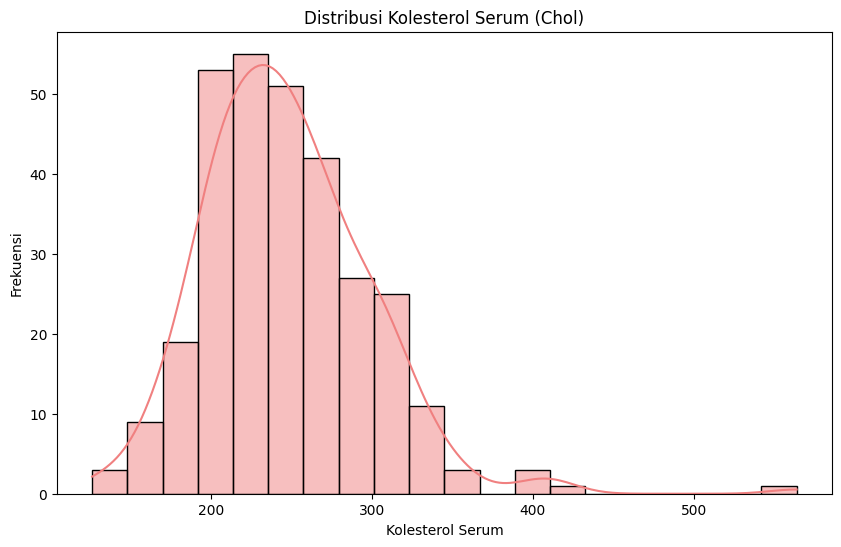

In [ ]:
df['chol'] = pd.to_numeric(df['chol'], errors='coerce')

# Drop rows where 'chol' is NaN
df.dropna(subset=['chol'], inplace=True)

# Ensure 'chol' is now numeric
df['chol'] = df['chol'].astype(float)

plt.figure(figsize=(10, 6))
sns.histplot(df['chol'], kde=True, bins=20, color='lightcoral')
plt.title('Distribusi Kolesterol Serum (Chol)')
plt.xlabel('Kolesterol Serum')
plt.ylabel('Frekuensi')
plt.show()

### FBS

#### Memeriksa Column FBS

In [ ]:
df.groupby('fbs').count()

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,ca,thal,num
fbs,,,,,,,,,,,,,
0.0,258,258,258,258,258,258,258,258,258,258,258,258,258
1.0,45,45,45,45,45,45,45,45,45,45,45,45,45


#### Visualisasi FBS

<ipython-input-22-9b95ecc0c2f5>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='fbs_label', data=df, palette='viridis')


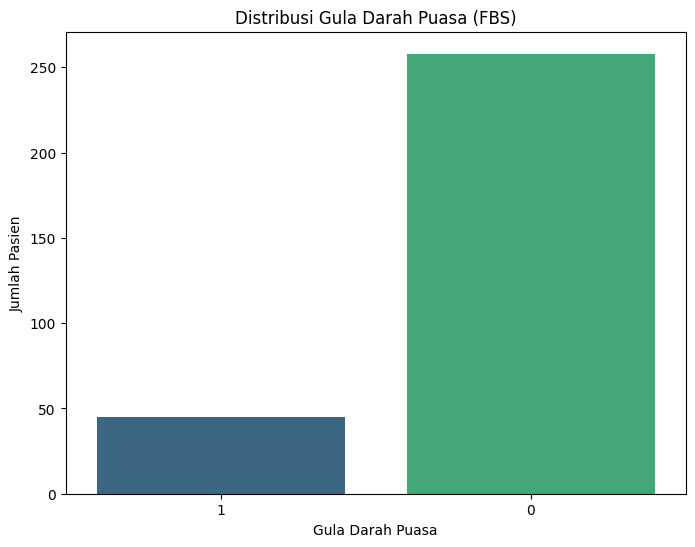

In [ ]:
# Map FBS values to descriptive labels
fbs_labels = {
    0: '0',
    1: '1'
}

# Replace numerical values with labels for plotting
df['fbs_label'] = df['fbs'].map(fbs_labels)

# Create the bar plot for 'fbs'
plt.figure(figsize=(8, 6))
sns.countplot(x='fbs_label', data=df, palette='viridis')
plt.title('Distribusi Gula Darah Puasa (FBS)')
plt.xlabel('Gula Darah Puasa')
plt.ylabel('Jumlah Pasien')
plt.show()

# Drop the temporary 'fbs_label' column
df.drop('fbs_label', axis=1, inplace=True)

### RESTECG

#### Memeriksa Column RESTECG

In [ ]:
df.groupby('restecg').count()

,age,sex,cp,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,thal,num
restecg,,,,,,,,,,,,,
0.0,151,151,151,151,151,151,151,151,151,151,151,151,151
1.0,4,4,4,4,4,4,4,4,4,4,4,4,4
2.0,148,148,148,148,148,148,148,148,148,148,148,148,148


#### Visualisasi RESTECG

<ipython-input-24-54733279bdda>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='restecg_label', data=df, palette='viridis', order=[restecg_labels[0], restecg_labels[1], restecg_labels[2]])


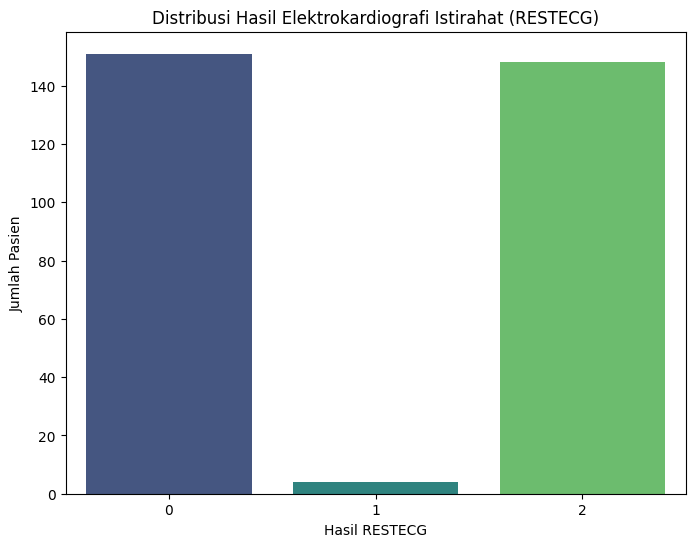

In [ ]:
# Map RESTECG values to descriptive labels
restecg_labels = {
    0: '0',  # Normal
    1: '1',  # Abnormalitas gelombang ST-T
    2: '2'   # Hipertrofi ventrikel kiri
}

# Replace numerical values with labels for plotting
df['restecg_label'] = df['restecg'].map(restecg_labels)

# Create the bar plot for 'restecg'
plt.figure(figsize=(8, 6))
sns.countplot(x='restecg_label', data=df, palette='viridis', order=[restecg_labels[0], restecg_labels[1], restecg_labels[2]])
plt.title('Distribusi Hasil Elektrokardiografi Istirahat (RESTECG)')
plt.xlabel('Hasil RESTECG')
plt.ylabel('Jumlah Pasien')
plt.show()

# Drop the temporary 'restecg_label' column
df.drop('restecg_label', axis=1, inplace=True)

### THALACH

#### Memeriksa column THALACH

In [ ]:
print('Mean:', df['thalach'].mean())
print('Min:', df['thalach'].min())
print('Max:', df['thalach'].max())

Mean: 149.6072607260726
Min: 71.0
Max: 202.0


#### Visualisasi THALACH

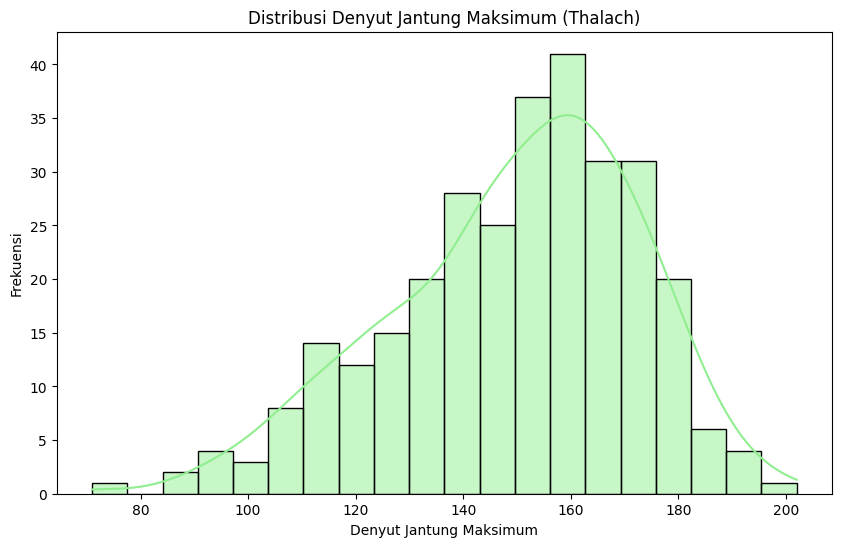

In [ ]:
df['thalach'] = pd.to_numeric(df['thalach'], errors='coerce')

# Drop rows where 'thalach' is NaN
df.dropna(subset=['thalach'], inplace=True)

# Ensure 'thalach' is now numeric
df['thalach'] = df['thalach'].astype(float)

plt.figure(figsize=(10, 6))
sns.histplot(df['thalach'], kde=True, bins=20, color='lightgreen')
plt.title('Distribusi Denyut Jantung Maksimum (Thalach)')
plt.xlabel('Denyut Jantung Maksimum')
plt.ylabel('Frekuensi')
plt.show()

### EXANG

#### Memeriksa column EXANG

In [ ]:
df.groupby('exang').count()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,oldpeak,slope,ca,thal,num
exang,,,,,,,,,,,,,
0.0,204,204,204,204,204,204,204,204,204,204,204,204,204
1.0,99,99,99,99,99,99,99,99,99,99,99,99,99


#### Visualisasi EXANG

<ipython-input-28-52dc824bee52>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='exang_label', data=df, palette='viridis', order=[exang_labels[0], exang_labels[1]])


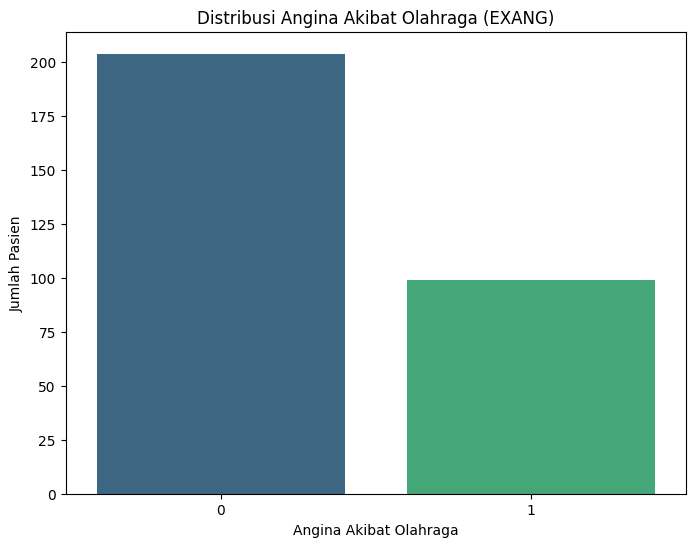

In [ ]:
# Map EXANG values to descriptive labels
exang_labels = {
    0: '0',
    1: '1'
}

# Replace numerical values with labels for plotting
df['exang_label'] = df['exang'].map(exang_labels)

# Create the bar plot for 'exang'
plt.figure(figsize=(8, 6))
sns.countplot(x='exang_label', data=df, palette='viridis', order=[exang_labels[0], exang_labels[1]])
plt.title('Distribusi Angina Akibat Olahraga (EXANG)')
plt.xlabel('Angina Akibat Olahraga')
plt.ylabel('Jumlah Pasien')
plt.show()

# Drop the temporary 'exang_label' column
df.drop('exang_label', axis=1, inplace=True)

### OLDPEAK

#### Memeriksa column OLDPEAK

In [ ]:
print('Mean:', df['oldpeak'].mean())
print('Min:', df['oldpeak'].min())
print('Max:', df['oldpeak'].max())

Mean: 1.0396039603960396
Min: 0.0
Max: 6.2


#### Visualisasi OLDPEAK

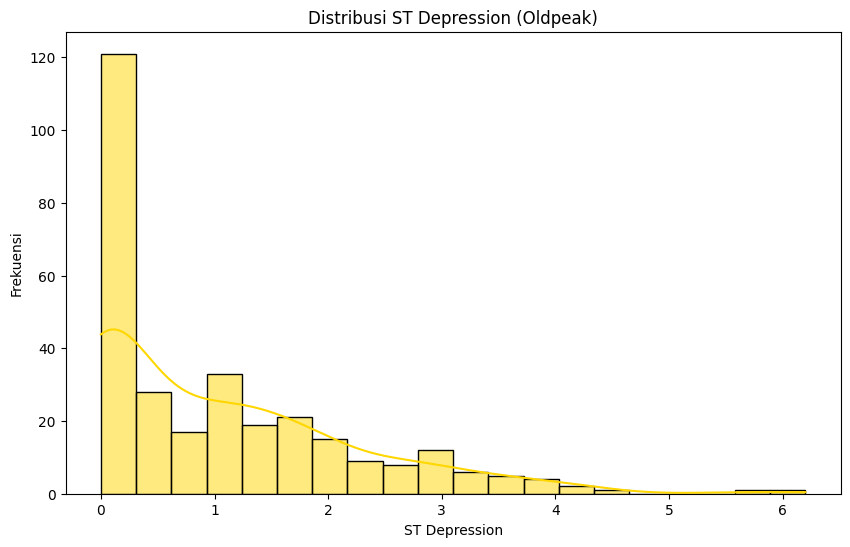

In [ ]:
df['oldpeak'] = pd.to_numeric(df['oldpeak'], errors='coerce')

# Drop rows where 'oldpeak' is NaN
df.dropna(subset=['oldpeak'], inplace=True)

# Ensure 'oldpeak' is now numeric
df['oldpeak'] = df['oldpeak'].astype(float)

plt.figure(figsize=(10, 6))
sns.histplot(df['oldpeak'], kde=True, bins=20, color='gold')
plt.title('Distribusi ST Depression (Oldpeak)')
plt.xlabel('ST Depression')
plt.ylabel('Frekuensi')
plt.show()

### SLOPE

#### Memeriksa column SLOPE

In [ ]:
df.groupby('slope').count()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,thal,num
slope,,,,,,,,,,,,,
1.0,142,142,142,142,142,142,142,142,142,142,142,142,142
2.0,140,140,140,140,140,140,140,140,140,140,140,140,140
3.0,21,21,21,21,21,21,21,21,21,21,21,21,21


#### Visualisasi SLOPE

<ipython-input-32-f048d644fb7b>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='slope_label', data=df, palette='viridis', order=[slope_labels[1], slope_labels[2], slope_labels[3]])


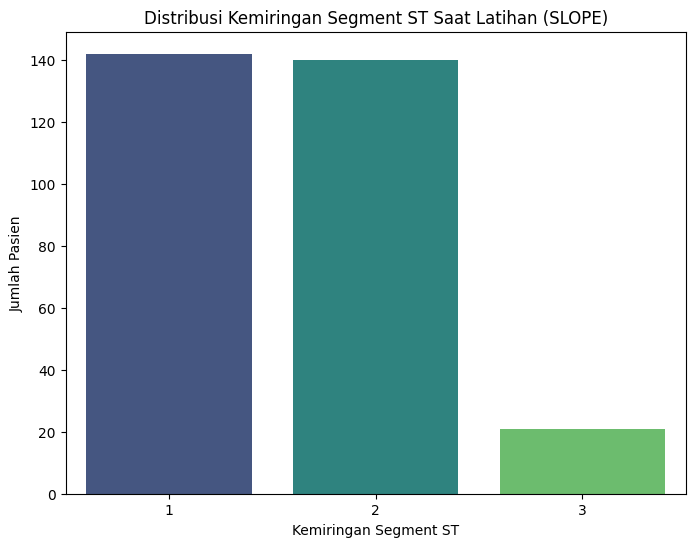

In [ ]:
# Map SLOPE values to descriptive labels
slope_labels = {
    1: '1',  # Up-sloping
    2: '2',  # Flat
    3: '3'   # Down-sloping
}

# Replace numerical values with labels for plotting
df['slope_label'] = df['slope'].map(slope_labels)

# Create the bar plot for 'slope'
plt.figure(figsize=(8, 6))
sns.countplot(x='slope_label', data=df, palette='viridis', order=[slope_labels[1], slope_labels[2], slope_labels[3]])
plt.title('Distribusi Kemiringan Segment ST Saat Latihan (SLOPE)')
plt.xlabel('Kemiringan Segment ST')
plt.ylabel('Jumlah Pasien')
plt.show()

# Drop the temporary 'slope_label' column
df.drop('slope_label', axis=1, inplace=True)

### CA

#### Memeriksa column CA

In [ ]:
df.groupby('ca').count()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,num
ca,,,,,,,,,,,,,
0.0,176,176,176,176,176,176,176,176,176,176,176,176,176
1.0,65,65,65,65,65,65,65,65,65,65,65,65,65
2.0,38,38,38,38,38,38,38,38,38,38,38,38,38
3.0,20,20,20,20,20,20,20,20,20,20,20,20,20
?,4,4,4,4,4,4,4,4,4,4,4,4,4


? Ini adalah missing value

#### Visualisasi CA

<ipython-input-34-cd695a8ac1c1>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ca_counts.index, y=ca_counts.values, palette='viridis')


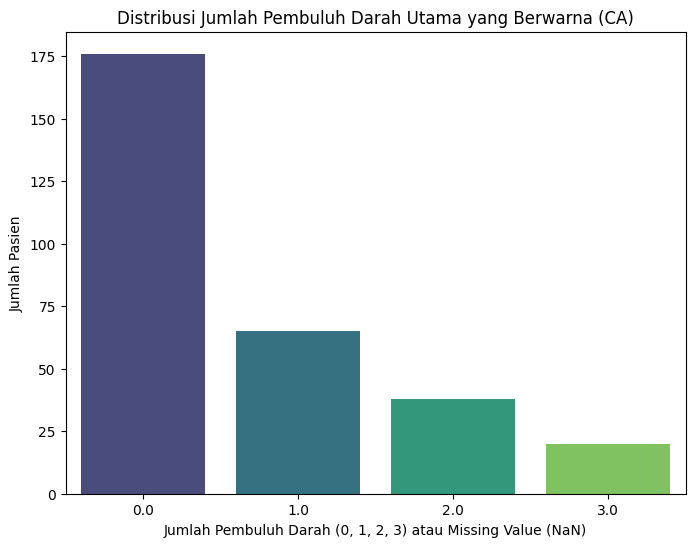

In [ ]:
DFF = df.copy()
# Replace '?' with NaN for easier handling
DFF['ca'] = DFF['ca'].replace('?', np.nan)

# Convert 'ca' to numeric, coercing errors will turn non-numeric (like '?') into NaN
DFF['ca'] = pd.to_numeric(DFF['ca'])

# Count the occurrences of each 'ca' value (including NaN)
ca_counts = DFF['ca'].value_counts(dropna=False).sort_index()

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=ca_counts.index, y=ca_counts.values, palette='viridis')
plt.title('Distribusi Jumlah Pembuluh Darah Utama yang Berwarna (CA)')
plt.xlabel('Jumlah Pembuluh Darah (0, 1, 2, 3) atau Missing Value (NaN)')
plt.ylabel('Jumlah Pasien')
plt.show()

### THAL

#### Memeriksa column THAL

In [ ]:
df.groupby('thal').count()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,num
thal,,,,,,,,,,,,,
3.0,166,166,166,166,166,166,166,166,166,166,166,166,166
6.0,18,18,18,18,18,18,18,18,18,18,18,18,18
7.0,117,117,117,117,117,117,117,117,117,117,117,117,117
?,2,2,2,2,2,2,2,2,2,2,2,2,2


? Ini adalah missing value

#### Visualisasi THAL

<ipython-input-36-e75644b08416>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=thal_counts.index, y=thal_counts.values, palette='viridis')


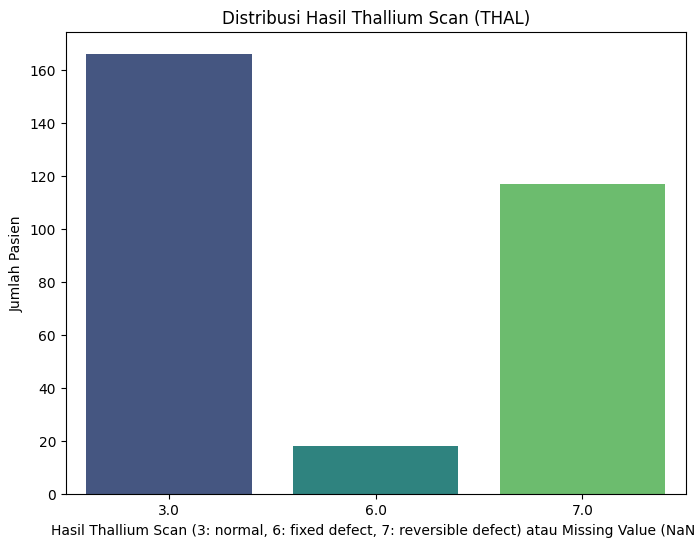

In [ ]:
DFF['thal'] = DFF['thal'].replace('?', np.nan)

# Convert 'thal' to numeric, coercing errors will turn non-numeric (like '?') into NaN
DFF['thal'] = pd.to_numeric(DFF['thal'])

# Count the occurrences of each 'thal' value (including NaN)
thal_counts = DFF['thal'].value_counts(dropna=False).sort_index()

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=thal_counts.index, y=thal_counts.values, palette='viridis')
plt.title('Distribusi Hasil Thallium Scan (THAL)')
plt.xlabel('Hasil Thallium Scan (3: normal, 6: fixed defect, 7: reversible defect) atau Missing Value (NaN)')
plt.ylabel('Jumlah Pasien')
plt.show()

### NUM

#### Memeriksa column 'num'

In [ ]:
df.groupby('num').count()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
num,,,,,,,,,,,,,
0,164,164,164,164,164,164,164,164,164,164,164,164,164
1,55,55,55,55,55,55,55,55,55,55,55,55,55
2,36,36,36,36,36,36,36,36,36,36,36,36,36
3,35,35,35,35,35,35,35,35,35,35,35,35,35
4,13,13,13,13,13,13,13,13,13,13,13,13,13


#### Visualisasi Num

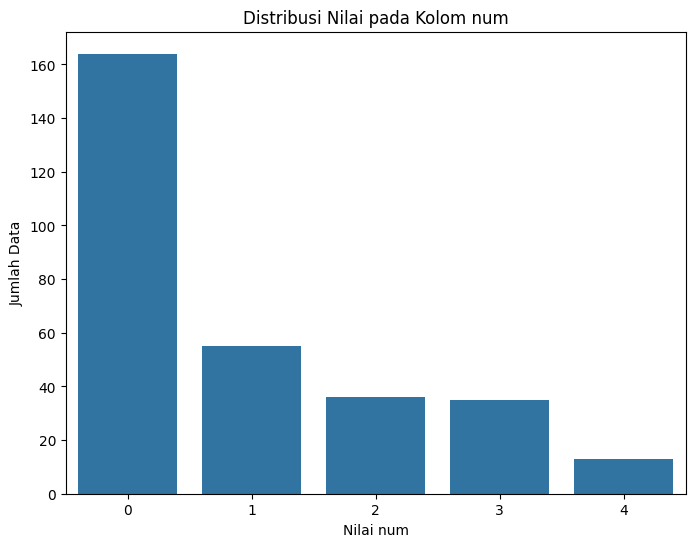

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='num', data=df)
plt.title('Distribusi Nilai pada Kolom num')
plt.xlabel('Nilai num')
plt.ylabel('Jumlah Data')
plt.show()

# DATA PREPARATION

In [ ]:
df_clean = df.copy()

## Menghapus Nilai Null

In [ ]:
df_clean = df_clean.replace('?', np.nan)
df_clean = df_clean.dropna()
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    object 
 12  thal      297 non-null    object 
 13  num       297 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 34.8+ KB


## Konvesi Tipe Data

In [ ]:
numeric_columns = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','slope','ca','thal']
for col in numeric_columns:
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

df_clean[numeric_columns] = df_clean[numeric_columns].astype('Int64')

In [ ]:
category_columns = ['sex','cp','fbs','restecg','exang','slope','thal']
df_clean[category_columns] = df_clean[category_columns].astype('category')

In [ ]:
df_clean.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       297 non-null    Int64   
 1   sex       297 non-null    category
 2   cp        297 non-null    category
 3   trestbps  297 non-null    Int64   
 4   chol      297 non-null    Int64   
 5   fbs       297 non-null    category
 6   restecg   297 non-null    category
 7   thalach   297 non-null    Int64   
 8   exang     297 non-null    category
 9   oldpeak   297 non-null    float64 
 10  slope     297 non-null    category
 11  ca        297 non-null    Int64   
 12  thal      297 non-null    category
 13  num       297 non-null    int64   
dtypes: Int64(5), category(7), float64(1), int64(1)
memory usage: 23.0 KB


## Mengubah Value Column Num

In [ ]:
df_clean['num'] = df_clean['num'].apply(lambda x: 1 if x in [2, 3, 4] else x)
print(df_clean['num'].value_counts())

num
0    160
1    137
Name: count, dtype: int64


## Menghapus Nilai OUTLIER

In [ ]:
# Daftar index baris yang akan dihapus
rows_to_delete = [183, 14, 201, 48, 152, 173]

# Menghapus baris berdasarkan index
df_clean = df_clean.drop(index=rows_to_delete)

print("Data setelah baris dihapus:")
print(df_clean.info())

Data setelah baris dihapus:
<class 'pandas.core.frame.DataFrame'>
Index: 291 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       291 non-null    Int64   
 1   sex       291 non-null    category
 2   cp        291 non-null    category
 3   trestbps  291 non-null    Int64   
 4   chol      291 non-null    Int64   
 5   fbs       291 non-null    category
 6   restecg   291 non-null    category
 7   thalach   291 non-null    Int64   
 8   exang     291 non-null    category
 9   oldpeak   291 non-null    float64 
 10  slope     291 non-null    category
 11  ca        291 non-null    Int64   
 12  thal      291 non-null    category
 13  num       291 non-null    int64   
dtypes: Int64(5), category(7), float64(1), int64(1)
memory usage: 22.6 KB
None


In [ ]:
df_clean.shape

(291, 14)

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 291 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       291 non-null    Int64   
 1   sex       291 non-null    category
 2   cp        291 non-null    category
 3   trestbps  291 non-null    Int64   
 4   chol      291 non-null    Int64   
 5   fbs       291 non-null    category
 6   restecg   291 non-null    category
 7   thalach   291 non-null    Int64   
 8   exang     291 non-null    category
 9   oldpeak   291 non-null    float64 
 10  slope     291 non-null    category
 11  ca        291 non-null    Int64   
 12  thal      291 non-null    category
 13  num       291 non-null    int64   
dtypes: Int64(5), category(7), float64(1), int64(1)
memory usage: 22.6 KB


## Standarisasi

In [ ]:
scaler = StandardScaler()

In [ ]:
dfr = df_clean.copy()
dfr = scaler.fit_transform(dfr)
dfr = pd.DataFrame(dfr, columns=df_clean.columns)
dfr.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,0.951104,0.679935,-2.246457,0.797231,-0.255955,2.469324,1.017380,0.022903,-0.701646,1.079675,2.277335,-0.729150,0.659343,-0.943192
1,1.393407,0.679935,0.871440,1.665689,0.874837,-0.404969,1.017380,-1.794741,1.425219,0.389347,0.649069,2.453591,-0.892157,1.060230
2,1.393407,0.679935,0.871440,-0.650200,-0.341298,-0.404969,1.017380,-0.885919,1.425219,1.338548,0.649069,1.392677,1.176510,1.060230
3,-1.923867,0.679935,-0.167859,-0.071228,0.106752,-0.404969,-0.996617,1.624160,-0.701646,2.115166,2.277335,-0.729150,-0.892157,-0.943192
4,-1.481564,-1.470729,-1.207158,-0.071228,-0.874690,-0.404969,1.017380,0.975002,-0.701646,0.303056,-0.979198,-0.729150,-0.892157,-0.943192


## Train Test Split

In [ ]:
X = df_clean.drop('num', axis=1)
y = df_clean['num']
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

In [ ]:
X_train.shape

(261, 13)

# MODELING

In [ ]:
model = Sequential([
    Dense(64, input_dim=13, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_accuracy', mode='max', patience=20, restore_best_weights=True, verbose=1)
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=18,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100
15/15 [==============================] - 2s 53ms/step - loss: 0.6559 - accuracy: 0.6398 - val_loss: 0.5671 - val_accuracy: 0.7333
Epoch 2/100
15/15 [==============================] - 0s 10ms/step - loss: 0.5620 - accuracy: 0.8199 - val_loss: 0.4529 - val_accuracy: 0.9333
Epoch 3/100
15/15 [==============================] - 0s 13ms/step - loss: 0.4848 - accuracy: 0.8238 - val_loss: 0.3640 - val_accuracy: 0.9333
Epoch 4/100
15/15 [==============================] - 0s 21ms/step - loss: 0.4302 - accuracy: 0.8238 - val_loss: 0.2939 - val_accuracy: 0.9000
Epoch 5/100
15/15 [==============================] - 0s 17ms/step - loss: 0.3932 - accuracy: 0.8352 - val_loss: 0.2507 - val_accuracy: 0.9000
Epoch 6/100
15/15 [==============================] - 0s 14ms/step - loss: 0.3709 - accuracy: 0.8429 - val_loss: 0.2194 - val_accuracy: 0.9667
Epoch 7/100
15/15 [==============================] - 0s 9ms/step - loss: 0.3546 - accuracy: 0.8467 - val_loss: 0.2035 - val_accuracy: 0.9667
Epoch 8

# EVALUASI

In [ ]:
# Evaluasi model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

1/1 [==============================] - 0s 31ms/step - loss: 0.2194 - accuracy: 0.9667
Test Loss: 0.2194
Test Accuracy: 0.9667


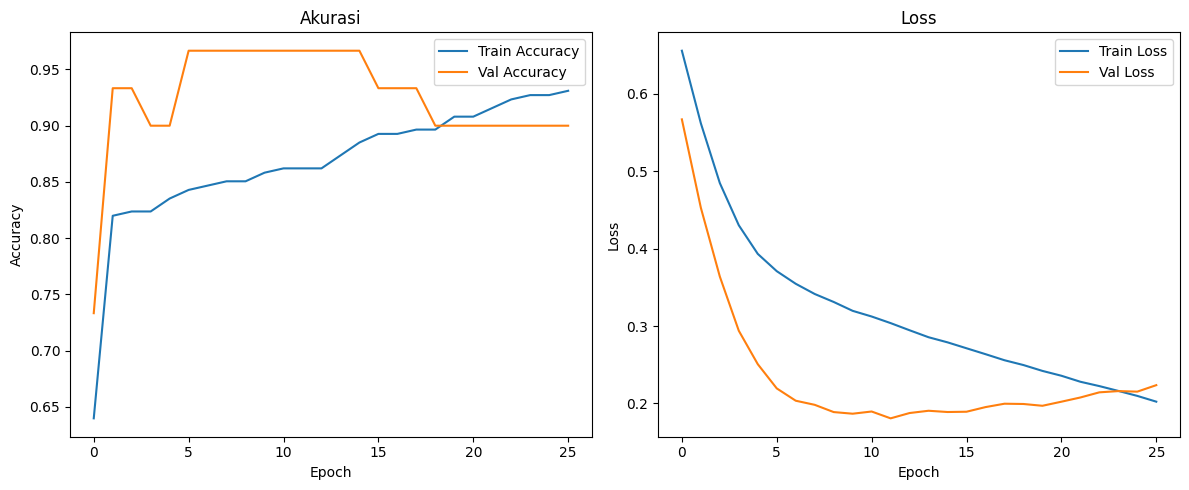

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Akurasi')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


1/1 [==============================] - 0s 129ms/step


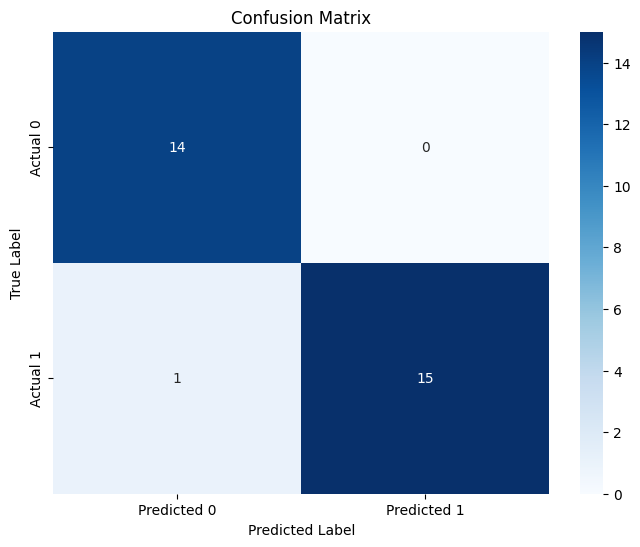

In [ ]:

# Buat prediksi pada data test
y_pred = model.predict(X_test)
# Mengubah prediksi probabilitas menjadi kelas (0 atau 1)
y_pred_classes = (y_pred > 0.5).astype("int64")

# Buat Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# KONVERSI MODEL

In [ ]:
# Save model for TensorFlow.js
MODEL_DIR = './public/model'

# Save the model in TensorFlow.js format
tfjs.converters.save_keras_model(model, MODEL_DIR)

# Save scaler information (mean and variance) for preprocessing in JavaScript
scaler_info = {
    'mean': scaler.mean_.tolist(),
    'scale': scaler.scale_.tolist(),
    'feature_names': X.columns.tolist()
}

with open(f'{MODEL_DIR}/scaler_info.json', 'w') as f:
    json.dump(scaler_info, f)

print(f"Model and scaler exported to {MODEL_DIR}")

Model and scaler exported to ./public/model


/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
!zip -r public.zip public

In [ ]:
MODEL_DIR = './saved_model'  # Choose a directory to save the model
tf.saved_model.save(model, MODEL_DIR)

print(f"Model saved to {MODEL_DIR}")

Model saved to ./saved_model


# INFERENCE

In [ ]:
# Muat SavedModel dari direktori yang berisi saved_model.pb
model_path = './saved_model'  # Ganti dengan path ke direktori SavedModel Anda
model = tf.saved_model.load(model_path)
print('SavedModel loaded successfully!')

# Dapatkan fungsi inferensi (signature) dari model
infer = model.signatures['serving_default']

# Data input yang diberikan:
input_data = [63, 1, 1, 145, 233, 1, 2, 150, 0, 2, 3, 0, 6]

# Muat informasi scaler dari scaler_info.json
with open('/content/public/model/scaler_info.json', 'r') as f:
    scaler_info = json.load(f)

# Buat instance StandardScaler dan atur mean dan scale dari scaler_info
scaler = StandardScaler()
scaler.mean_ = scaler_info['mean']
scaler.scale_ = scaler_info['scale']
# atau bisa juga seperti ini
# scaler = StandardScaler()
# scaler.mean_ = np.array(scaler_info['mean'])
# scaler.var_ = np.array(scaler_info['scale'])**2 # var_ adalah variance, bukan scale


# Ubah data input menjadi bentuk yang sesuai untuk model dan scaling
example_input = np.array([input_data], dtype=np.float32)
example_input_scaled = scaler.transform(example_input)  # Terapkan scaling

# Lakukan inferensi dengan data yang telah di-scaling
input_name = list(infer.structured_input_signature[1].keys())[0]
output_name = list(infer.structured_outputs.keys())[0]
predictions = infer(**{input_name: example_input_scaled})[output_name]

# Cetak hasil prediksi
print("Predictions:", predictions)

SavedModel loaded successfully!
Predictions: tf.Tensor([[0.45357993]], shape=(1, 1), dtype=float32)
